# 朴素贝叶斯法demo

## 1、引入对应的库并查看数据集内容

In [3]:
import numpy as np
from sklearn import datasets
# 引入数据集
import matplotlib.pyplot as plt
from pandas import Series
# 引入对应库
irisData = datasets.load_iris()
irisData
print("targetName:%s" % irisData["target_names"])
print("featureName:%s" % irisData["feature_names"])
print("target:%s" % irisData["target"])
dataSet = irisData["data"]
dataSet[1:5]

targetName:['setosa' 'versicolor' 'virginica']
featureName:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

sepal length (cm)变量取值区间: [4.3 7.9]
sepal width (cm)变量取值区间: [2.  4.4]
petal length (cm)变量取值区间: [1.  6.9]
petal width (cm)变量取值区间: [0.1 2.5]


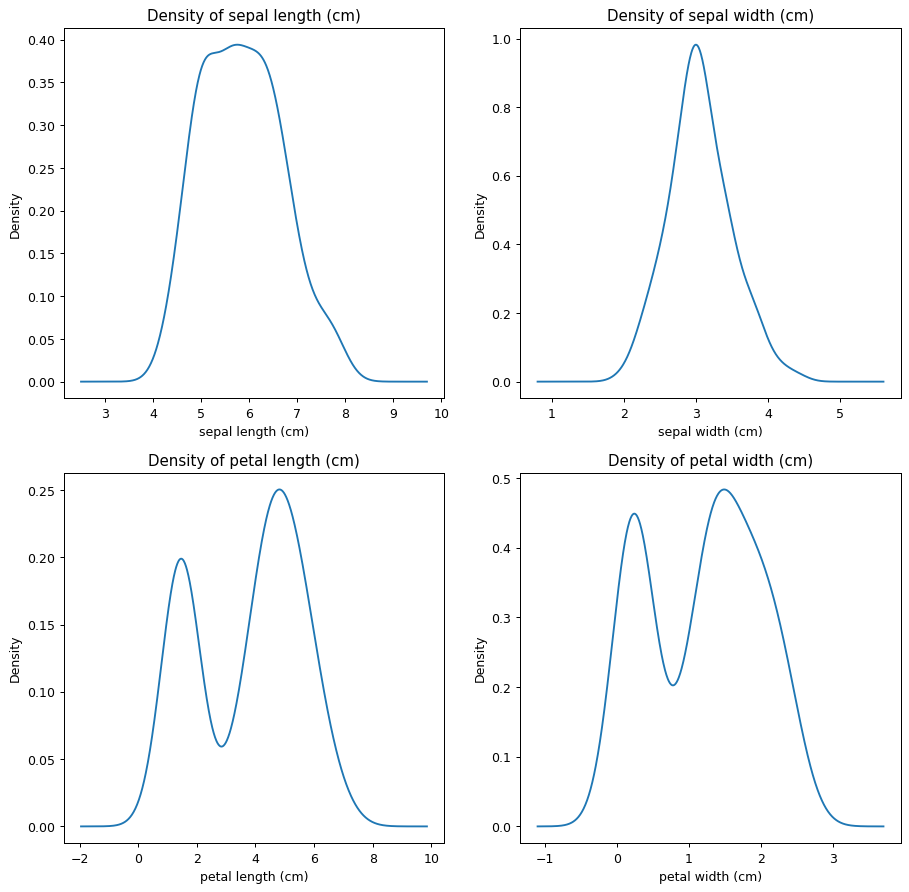

In [4]:
setNum = 221  # 绘图定位表示从两行两列的第一个开始
plt.figure(figsize=(12,12), dpi=90)
# 定义绘图的尺寸和每张图片的大小
for i in range(4):
    plt.subplot(setNum + i)
    eachArray = dataSet[:,i]
    # 数据集的每一列数据，即每一个变量的数据
    Series(eachArray).plot(kind = 'kde')
    plt.xlabel(irisData["feature_names"][i])
    plt.title("Density of %s" % irisData["feature_names"][i])
    print("%s变量取值区间:" % irisData["feature_names"][i], np.array([np.min(eachArray), np.max(eachArray)]))

## 2、建立朴素贝叶斯模型

In [283]:
class Bayes:
    def __init__(self, obj, target, feature, targetName,lam=1):
        '''
        初始化模型，
        lamda默认为1，表示贝叶斯估计中的拉普拉斯平滑
        这里的思路是没有控制每一个变量的参数个数相同，而是将每一个变量的步长设置相同
        具体情况具体分析
        '''
        self.dictArray = {}
        self.Pprior = {}  # 贝叶斯模型先验概率
        self.lam = lam
        self.feature = feature
        self.dataSet = obj
        self.target = target
        self.targetName = targetName
        for i in feature:
            # 整个字典的第一维表示变量类型第二维表示物种类型即标签类型最后一维表示每一个变量可能出现的数值
            minNum = (np.min(obj[:,feature.index(i)]) + 0.5) // 1
            maxNum = np.ceil(np.max(obj[:,feature.index(i)]))
            tmpArray = np.arange(minNum,maxNum,0.5)
            self.dictArray[i] = {}
            for j in set(target):
                self.dictArray[i][j] = {}
                for k in tmpArray:
                    self.dictArray[i][j][k] = 0
                
    def funShuffle(self):
        index = np.random.choice(np.arange(self.dataSet.shape[0]), size = self.dataSet.shape[0], replace = False)
        # 产生一个随机不重复的序列
        self.listTrain = []
        self.listTest = []
        for i in range(self.dataSet.shape[0]):
            if (i < 0.8 * self.dataSet.shape[0]):
                self.listTrain.append([self.dataSet[index[i]], self.target[index[i]]])
            else:
                self.listTest.append([self.dataSet[index[i]], self.target[index[i]]])
    
    def funTrain(self):
        # 先运行funShuffle再运行该函数
        for i in self.targetName:
            typeIndex = np.array(self.listTrain,dtype=object)[:,1]
            # train列表中的第二列，表示每一个样本的标签
            typeValue = list(self.targetName).index(i)
            # 每一类样本的值
            self.Pprior[i] = (list(typeIndex).count(typeValue)+self.lam) / (len(self.listTrain)+len(self.targetName)*self.lam)
            # 计算先验概率
        for j in test.listTrain:
            j[0] = (np.floor(j[0]) + np.around(j[0] - np.floor(j[0])) / 2)
            for k in range(len(j[0])):
                self.dictArray[self.feature[k]][j[1]][j[0][k]] += 1
        for i in range(len(self.targetName)):
            eachCount = list(np.array(self.listTrain,dtype=object)[:,1]).count(i)
            for j in self.dictArray.keys():
                tmpDict = self.dictArray[j][i] # 字典的第三维
                tmpList = (np.array(list(tmpDict.values())) + self.lam) / (eachCount + self.lam * len(tmpDict))
                # 计算出来的每个变量的条件概率，用向量计算
                self.dictArray[j][i] = dict(zip(list(tmpDict.keys()), tmpList))
                # 经计算和转换将计数的字典转换为记录条件概率的字典
                
    def funTest(self):
        # 先运行funTrain再运行该函数，函数返回测试集的错误率
        errorCount = 0
        for item in self.listTest:
            listP = np.array(list(self.Pprior.values()))
            for i in range(len(item[0])):
                Value = (np.floor(item[0]) + np.around(item[0] - np.floor(item[0])) / 2)
                tmpP = [self.dictArray[self.feature[i]][0][Value[i]], self.dictArray[self.feature[i]][1][Value[i]], self.dictArray[self.feature[i]][2][Value[i]]]
                listP = np.dot(listP, np.array(tmpP))
            flag = list(listP).index(max(listP))
            if flag != item[1]:
                errorCount += 1
        return (errorCount/len(self.listTest))
    
    def funOut(self, obj):
        # obj为符合实例对象变量个数的行向量
        listP = np.array(list(self.Pprior.values()))
        for i in range(obj.shape[0]):
            Value = (np.floor(obj) + np.around(obj - np.floor(obj)) / 2)
            tmpP = [self.dictArray[self.feature[i]][0][Value[i]], self.dictArray[self.feature[i]][1][Value[i]], self.dictArray[self.feature[i]][2][Value[i]]]
            listP = np.dot(listP, np.array(tmpP))
        flag = list(listP).index(max(listP))
        return self.targetName[flag]

## 3、实例化模型比较模型错误率

In [284]:
test = Bayes(dataSet, irisData["target"], irisData["feature_names"], irisData["target_names"])

test.funShuffle()

test.funTrain()
# print(test.dictArray)
print("test模型的错误率为%.2f" %(test.funTest()*100), end="%\n")

test模型的错误率为6.67%


In [286]:
test2 = Bayes(dataSet, irisData["target"], irisData["feature_names"], irisData["target_names"])

test2.funShuffle()

test2.funTrain()

print("test2模型的错误率为%.2f" %(test2.funTest()*100), end="%\n")
# 训练的模型识别准确率与训练集数据有关，而与训练集的先后顺序无关

test2模型的错误率为0.00%


## 4、查看模型的输出结果：

In [287]:
inValue = np.array([5. , 3.6, 1.4, 0.2])
result1 = test.funOut(inValue)
result2 = test2.funOut(inValue)
print("该数据在模型一中被识别为：%s" % result1)
print("该数据在模型二中被识别为：%s" % result2)

该数据在模型一中被识别为：setosa
该数据在模型二中被识别为：setosa
